# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [20]:
observations = 2000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(2000, 2)


### Generate the targets we will aim at

In [23]:
# We want to make a function and see if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 7 + <small noise> as in real life datasets
noise = np.random.uniform(-2, 1, (observations,1))

targets = 2*xs - 3*zs + 7 + noise

print (targets.shape)
print(noise)

(2000, 1)
[[-1.89492663]
 [-1.34230775]
 [ 0.20571007]
 ...
 [-1.40561271]
 [-0.09196686]
 [-0.35717813]]


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

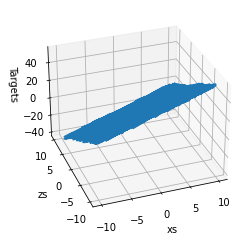

In [42]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=250)
plt.show()
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)


### Initialize variables

In [43]:
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print (weights)
print (biases)

[[-0.0835502 ]
 [ 0.05887644]]
[-0.08537797]


### Set a learning rate

In [44]:
# Play around with learning rate.
learning_rate = 0.002

### Train the model

In [45]:
for j in range (3):
    for i in range (1000):
    
        outputs = np.dot(inputs,weights) + biases
        deltas = outputs - targets
        
        loss = np.sum(deltas ** 2) / 2 / observations
    
        
    
        deltas_scaled = deltas / observations
    
        # Finally, apply the gradient descent update rules
        # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
        # Transpose the inputs so that we get an allowed operation.
        weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
        biases = biases - learning_rate * np.sum(deltas_scaled) 
    print (loss)

0.7782300280802876
0.3862873984619478
0.3790533873048634


### Print weights and biases and see if we have worked correctly.

In [46]:
print (weights, biases)

[[ 2.0001471 ]
 [-3.00425621]] [6.4729271]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

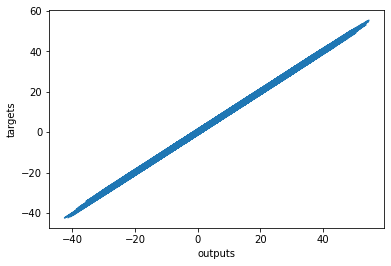

In [47]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()